<a href="https://colab.research.google.com/github/kiitaamuuraa/Asobiba/blob/main/navigraph_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from utils import load_datasets, load_nav_graphs

In [ ]:
import networkx as nx
import json
import numpy as np

In [ ]:
def my_load_nav_graphs(scans):
    ''' Load connectivity graph for each scan '''

    def distance(pose1, pose2):
        ''' Euclidean distance between two graph poses '''
        return ((pose1['pose'][3]-pose2['pose'][3])**2\
          + (pose1['pose'][7]-pose2['pose'][7])**2\
          + (pose1['pose'][11]-pose2['pose'][11])**2)**0.5

    graphs = {}
    for scan in scans:
        with open('../../connectivity/%s_connectivity.json' % scan) as f:
            G = nx.Graph()
            positions = {}
            data = json.load(f)
            for i,item in enumerate(data):
                if item['included']:
                    for j,conn in enumerate(item['unobstructed']):
                        if conn and data[j]['included']:
                            positions[item['image_id']] = np.array([item['pose'][3],
                                    item['pose'][7], item['pose'][11]]);
                            assert data[j]['unobstructed'][i], 'Graph should be undirected'
                            G.add_edge(item['image_id'],data[j]['image_id'],weight=distance(item,data[j]))
            nx.set_node_attributes(G, values=positions, name='position')
            graphs[scan] = G
    return graphs


In [ ]:
g_dict = my_load_nav_graphs(['17DRP5sb8fy'])

In [ ]:
g = g_dict['17DRP5sb8fy']

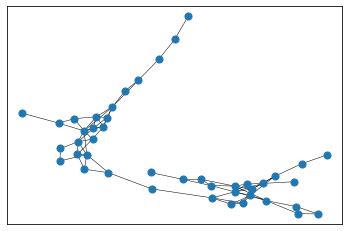

In [ ]:
nx.draw_networkx(g, with_labels=False, node_size=50, width=0.5)

In [ ]:
pair = dict(nx.all_pairs_dijkstra_path(g))

In [ ]:
pair['10c252c90fa24ef3b698c6f54d984c5c']['10c252c90fa24ef3b698c6f54d984c5c']

['10c252c90fa24ef3b698c6f54d984c5c']

In [ ]:
f = open('../../connectivity/17DRP5sb8fy_connectivity.json')
json_g = json.load(f)

## connectivity
Connectivity graphs indicating the navigable paths between viewpoints in each scan.

Each json file contains an array of annotations, one for each viewpoint in the scan. All annotations share the same basic structure as follows:

```
{
  "image_id": str,
  "pose": [float x 16],
  "included": boolean,
  "visible": [boolean x num_viewpoints],
  "unobstructed": [boolean x num_viewpoints],
  "height": float
}
```
- `image_id`: matterport skybox prefix
- `pose`: 4x4 matrix in row major order that transforms matterport skyboxes to global coordinates (z-up). Pose matrices are based on the assumption that the camera is facing skybox image 3.
- `included`: whether viewpoint is included in the simulator. Some overlapping viewpoints are excluded.
- `visible`: indicates other viewpoints that can be seen from this viewpoint.
- `unobstructed`: indicates transitions to other viewpoints that are considered navigable for an agent.
- `height`: estimated height of the viewpoint above the floor. Not required for the simulator.

Units are in metres.

`scans.txt` contains a list of all the scan ids in the dataset.


In [ ]:
import glob

In [ ]:
'num of json: {}'.format(len(glob.glob('../../connectivity/*.json')))

'num of json: 90'

In [ ]:
json_g[0]

{'image_id': '10c252c90fa24ef3b698c6f54d984c5c',
 'pose': [-0.934268,
  -0.00147015,
  -0.35657,
  -5.48891,
  0.356526,
  -0.0200643,
  -0.93407,
  1.4484,
  -0.00578122,
  -0.999798,
  0.0192692,
  1.53509,
  0,
  0,
  0,
  1],
 'included': True,
 'visible': [False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  False,
  True,
  True,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False],
 'unobstructed': [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
 